In [1]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data
df=pd.read_csv("D:\data analytics\data set\salaryemployees.csv")
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
# cleaning data
print(df.columns)
print(df.isna().sum())
print(df.duplicated().sum())
print(df.isna().sum().sum())
print(df.drop_duplicates(inplace=True))
print(df.duplicated())

Index(['Position', 'Level ', 'Salary'], dtype='object')
Position    0
Level       0
Salary      0
dtype: int64
0
0
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
None


In [5]:
df['Position']=df['Position'].astype('string')

In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,216500.000000
std,3.02765,285054.088435
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,215000.000000
max,10.00000,1000000.000000


([0, 1], [Text(0, 0, 'Level '), Text(1, 0, 'Salary')])

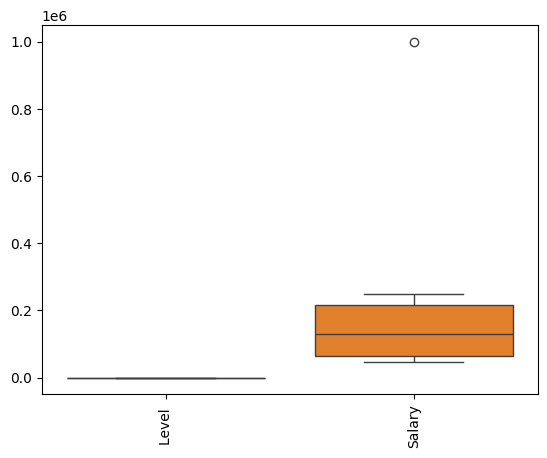

In [7]:
# finding outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)

         Level    Salary
Level   1.00000  0.72064
Salary  0.72064  1.00000


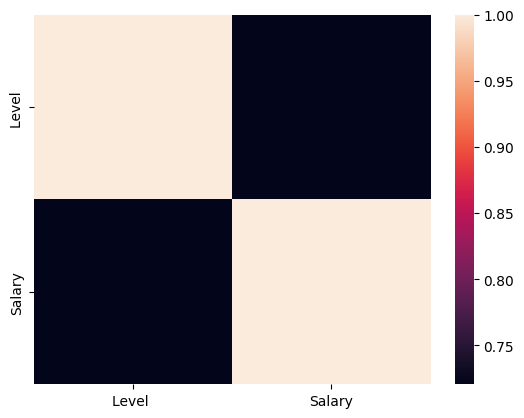

In [8]:
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

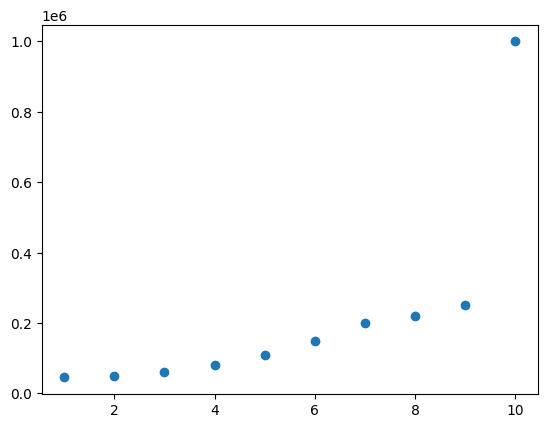

In [9]:
plt.scatter(x=df['Level '], y=df['Salary'])

In [10]:
# assigning dependent and independent variable
x=df.iloc[:,1:2]
y=df.iloc[:,-1]
print(x)
print(y)
df1=pd.DataFrame(x)
df2=pd.DataFrame(y)
print("level")
print(df1.to_string())
print("salary")
print(df2.to_string())

   Level 
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     220000
8     250000
9    1000000
Name: Salary, dtype: int64
level
   Level 
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
salary
    Salary
0    45000
1    50000
2    60000
3    80000
4   110000
5   150000
6   200000
7   220000
8   250000
9  1000000


In [11]:
from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

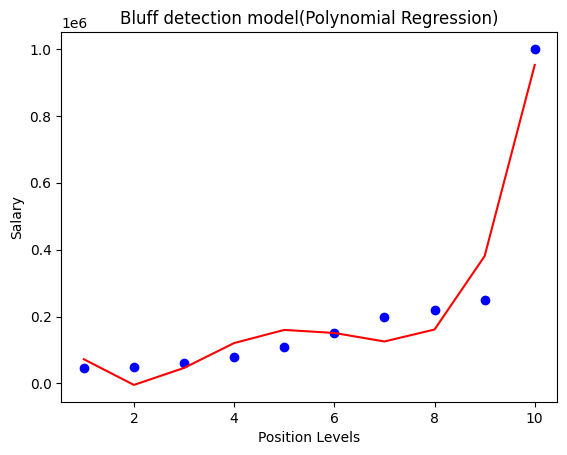

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 4)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)
plt.scatter(x,y,color="blue")
plt.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")
plt.title("Bluff detection model(Polynomial Regression)")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show()


In [13]:
lin_pred = lin_regs.predict([[6.5]])
print(lin_pred)
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))
print(poly_pred)
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)*100
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")




[284348.48484848]
[136407.43371223]
Mean Squared Error (MSE): 3643560606.0606
R-squared (R2): 95.0177


c:\Users\Agnes Sara Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
